<a href="https://colab.research.google.com/github/valmirf/mineracao_textual/blob/main/Classifica%C3%A7%C3%A3o/03e_ExercicioClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício: Classificando Petição Inicial de Problemas com Viagens

In [ ]:
!git clone https://github.com/valmirf/mineracao_textual.git

fatal: destination path 'mineracao_textual' already exists and is not an empty directory.


In [ ]:
import pandas as pd

df = data = pd.read_csv("mineracao_textual/Dados/dataset_ness_law.csv")
df.head()

,txt,objeto
0,fatos joão césar sala eldorado contagem marque...,Extravio de Bagagem
1,fatos fatos ocorridos trecho conforme document...,Doméstico
2,fatos autores presente ação programaram meses ...,Atraso ou Cancelamento de Voo
3,fatos objetivando viajar porto alegre particip...,Alteração na Malha Aérea
4,fatos autor comprou passagem retorno casa após...,Extravio de Bagagem


Analise a distribuição das classes, indicadas na coluna `Class Name`

In [ ]:
# sua resposta
df['objeto'].value_counts()

Atraso ou Cancelamento de Voo      136
Alteração na Malha Aérea            79
Doméstico                           59
Extravio de Bagagem                 49
Inconformidade de Taxas             26
Embarque Impedido                   16
Danificação de Bagagem               9
Equívoco ou Atraso no Reembolso      9
Provisório                           8
Erro ou Alteração na Reserva         6
Outros                               3
Name: objeto, dtype: int64

Analise a distribuição do comprimento dos reviews, plote um histograma (`DataFrame.plot.hist()`)

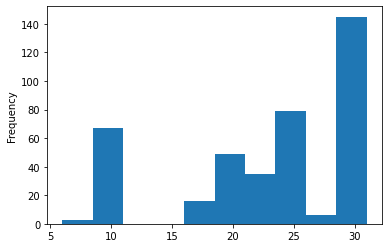

In [ ]:
# sua resposta
df['TamanhoObjeto'] = df['objeto'].apply(lambda x: len(x))
df['TamanhoObjeto'].plot.hist()

Aplique a função de encoding de rótulos categóricos do Sklearn ([LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)) para converter os rótulos de classe em numeros. Salve em uma coluna adicional no dataframe.

In [ ]:
# descartar classes minoritarias
major_classes = list(df['objeto'].value_counts()[0:4].index)
majority      = df.loc[df['objeto'].isin(major_classes),]
minority      = df.loc[~df['objeto'].isin(major_classes),]

print('\n',5*'=', 'major classes: \n',    majority['objeto'].value_counts()[0:4])
print('\n',5*'=', 'minority classes: \n', minority['objeto'].value_counts()[4:])

majority.head()


 ===== major classes: 
 Atraso ou Cancelamento de Voo    136
Alteração na Malha Aérea          79
Doméstico                         59
Extravio de Bagagem               49
Name: objeto, dtype: int64

 ===== minority classes: 
 Provisório                      8
Erro ou Alteração na Reserva    6
Outros                          3
Name: objeto, dtype: int64


,txt,objeto,TamanhoObjeto
0,fatos joão césar sala eldorado contagem marque...,Extravio de Bagagem,19
1,fatos fatos ocorridos trecho conforme document...,Doméstico,9
2,fatos autores presente ação programaram meses ...,Atraso ou Cancelamento de Voo,29
3,fatos objetivando viajar porto alegre particip...,Alteração na Malha Aérea,24
4,fatos autor comprou passagem retorno casa após...,Extravio de Bagagem,19


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(majority['objeto'])
majority['label'] = le.transform(majority['objeto'])
majority.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,txt,objeto,TamanhoObjeto,label
0,fatos joão césar sala eldorado contagem marque...,Extravio de Bagagem,19,3
1,fatos fatos ocorridos trecho conforme document...,Doméstico,9,2
2,fatos autores presente ação programaram meses ...,Atraso ou Cancelamento de Voo,29,1
3,fatos objetivando viajar porto alegre particip...,Alteração na Malha Aérea,24,0
4,fatos autor comprou passagem retorno casa após...,Extravio de Bagagem,19,3


Aplique o pipeline de pré-processamento utilizando o NLTK ou SpaCy (tokenização e remoção de stopwords), e em seguida, utilize as funções de transformação do Scikit-Learn para textos, utilizando os atributos de n-gramas para classificar os textos:
```
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
```
No qual você pode passar os valores de intervalos de n-gramas:
- um intervalo de ngram de (1, 1) significa apenas unigramas
- (1, 2) significa unigramas e bigrams 
- (2, 2) significa apenas bigrams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_onegram = TfidfVectorizer(use_idf=True, ngram_range=(1,1))
vectorizer_bigram  = TfidfVectorizer(use_idf=True, ngram_range=(2,2))
vectorizer_one_bigram  = TfidfVectorizer(use_idf=True, ngram_range=(1,2))

Separe o conjunto em treino e teste. Utilize a função `sklearn.model_selection.train_test_split()`

In [ ]:
from sklearn.model_selection import train_test_split

X = majority['txt']
y = majority['label']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
le.classes_

array(['Alteração na Malha Aérea', 'Atraso ou Cancelamento de Voo',
       'Doméstico', 'Extravio de Bagagem'], dtype=object)

Treine um modelo com o algoritmo `NaiveBayes`, e salve as predições para o conjunto de testes na variável `preds`

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import metrics

pipelines = [('onegram_nb', 
                Pipeline([('tfidf_onegram', vectorizer_onegram), 
                          ('nb', MultinomialNB())])),
             ('bigram_nb', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', MultinomialNB())])),
             ('onegram_svc', 
                Pipeline([('tfidf_onegram',  vectorizer_onegram),  
                          ('nb', SVC())])),
             ('bigram_svc', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', SVC())])),
             ('onegram_xgboost', 
                Pipeline([('tfidf_onegram',  vectorizer_onegram),  
                          ('nb', XGBClassifier())])),
             ('bigram_xgboost', 
                Pipeline([('tfidf_bigram',  vectorizer_bigram),  
                          ('nb', XGBClassifier())])),
             ('one_bigram_xgboost', 
                Pipeline([('tfidf_one_bigram',  vectorizer_one_bigram),  
                          ('nb', XGBClassifier())])),
             ]


for name, pipe in pipelines:
  print(10*'-')
  print(name)

  pipe.fit(X_train, y_train)
  preds = pipe.predict(X_test)
  print(metrics.classification_report(preds, y_test, target_names=list(le.classes_)))


----------
onegram_nb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

     Alteração na Malha Aérea       0.04      1.00      0.08         1
Atraso ou Cancelamento de Voo       1.00      0.43      0.60        96
                    Doméstico       0.00      0.00      0.00         0
          Extravio de Bagagem       0.00      0.00      0.00         0

                     accuracy                           0.43        97
                    macro avg       0.26      0.36      0.17        97
                 weighted avg       0.99      0.43      0.59        97

----------
bigram_nb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

     Alteração na Malha Aérea       0.29      0.78      0.42         9
Atraso ou Cancelamento de Voo       0.95      0.44      0.60        88
                    Doméstico       0.00      0.00      0.00         0
          Extravio de Bagagem       0.00      0.00      0.00         0

                     accuracy                           0.47        97
                    macro avg       0.31      0.31      0.26        97
                 weighted avg       0.89      0.47      0.59        97

----------
onegram_svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

     Alteração na Malha Aérea       0.38      0.90      0.53        10
Atraso ou Cancelamento de Voo       0.98      0.48      0.64        84
                    Doméstico       0.00      0.00      0.00         0
          Extravio de Bagagem       0.14      0.67      0.24         3

                     accuracy                           0.53        97
                    macro avg       0.37      0.51      0.35        97
                 weighted avg       0.89      0.53      0.62        97

----------
bigram_svc


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

     Alteração na Malha Aérea       0.29      0.88      0.44         8
Atraso ou Cancelamento de Voo       0.98      0.45      0.62        89
                    Doméstico       0.00      0.00      0.00         0
          Extravio de Bagagem       0.00      0.00      0.00         0

                     accuracy                           0.48        97
                    macro avg       0.32      0.33      0.26        97
                 weighted avg       0.92      0.48      0.60        97

----------
onegram_xgboost
                               precision    recall  f1-score   support

     Alteração na Malha Aérea       0.79      0.66      0.72        29
Atraso ou Cancelamento de Voo       0.78      0.68      0.73        47
                    Doméstico       0.28      0.71      0.40         7
          Extravio de Bagagem       0.79      0.79      0.79        14

                     accuracy                